# Importar Bibliotecas Necessárias
Importar as bibliotecas necessárias, incluindo pandas, numpy, scikit-learn, etc.

In [2]:
# Importar Bibliotecas Necessárias

import warnings
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from IPython.display import Markdown
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Configurar estilo dos gráficos
sns.set_style("whitegrid")

# Exibir todas as colunas do DataFrame
pd.set_option('display.max_columns', None)

# Ignorar warnings
warnings.filterwarnings('ignore')

# Carregar e Preparar os Dados
Carregar o dataset, filtrar apenas os vinhos brancos, criar a variável 'opinion' e descartar a variável 'quality'.

In [ ]:
# Carregar e Preparar os Dados

# Carregar o dataset
df = pd.read_csv('..\\dataset\\winequalityN.csv')

# Filtrar apenas os vinhos brancos
df_white = df[df['type'] == 'white']

# Criar a variável 'opinion'
df_white['opinion'] = np.where(df_white['quality'] <= 5, 0, 1)

# Descartar a variável 'quality'
df_white = df_white.drop(columns=['quality'])

# Exibir as primeiras linhas do DataFrame preparado
df_white.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


# Descrever as Variáveis
Descrever as variáveis presentes na base, seus tipos, médias e desvios padrões.

### Estatísticas Descritivas do Dataset


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### Verificação de Valores Ausentes


type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Número de linhas duplicadas: 1168
### Distribuição das Variáveis Numéricas


<Figure size 1500x1000 with 0 Axes>

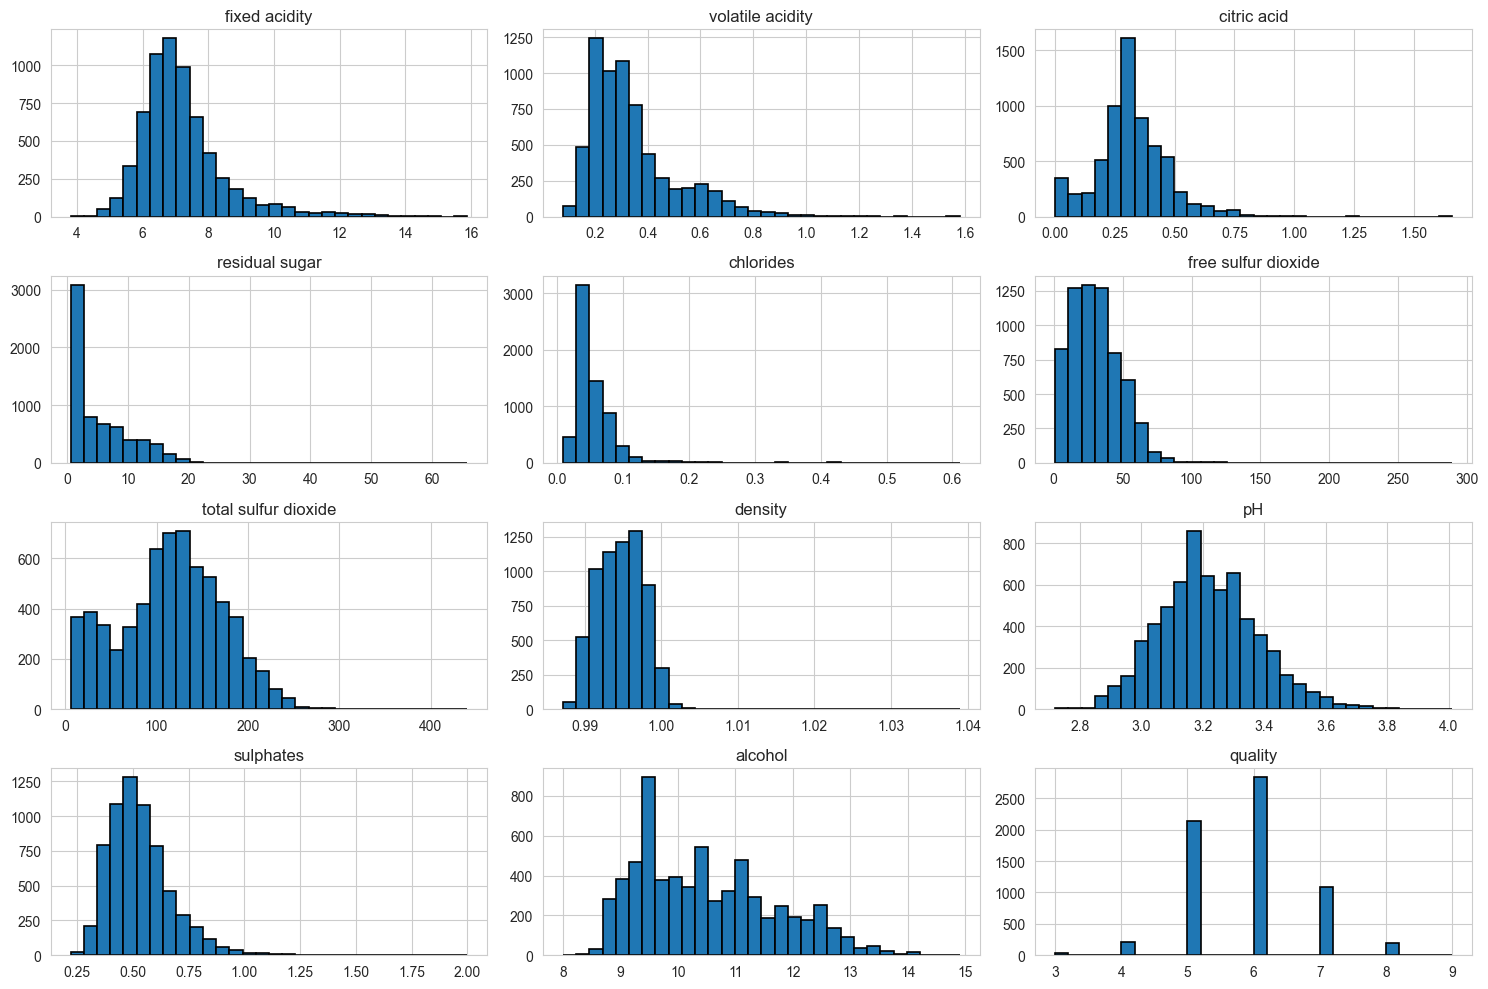

In [4]:
# # Descrever as Variáveis

print("### Estatísticas Descritivas do Dataset")
display(df.describe())

print("### Verificação de Valores Ausentes")
display(df.isnull().sum())

duplicatas = df.duplicated().sum()
print(f"Número de linhas duplicadas: {duplicatas}")

# Visualizando a distribuição das variáveis numéricas
print("### Distribuição das Variáveis Numéricas")
plt.figure(figsize=(15, 10))
df.hist(bins=30, edgecolor='black', linewidth=1.2, figsize=(15, 10))
plt.tight_layout()
plt.show()


# Etapas para Criar um Modelo de Classificação Eficiente
Descrever as etapas necessárias para criar um modelo de classificação eficiente.

In [5]:
# Etapas para Criar um Modelo de Classificação Eficiente

etapas_md = """
### Etapas para Criar um Modelo de Classificação Eficiente

1. **Entendimento do Problema**
   - Definir o objetivo do modelo de classificação.
   - Identificar as variáveis independentes (features) e a variável dependente (target).

2. **Coleta e Preparação dos Dados**
   - Carregar o dataset.
   - Filtrar os dados relevantes (neste caso, apenas vinhos brancos).
   - Criar a variável categórica 'opinion' baseada na variável 'quality'.
   - Descartar a variável 'quality' após a criação da variável 'opinion'.
   - Tratar valores ausentes, se houver.
   - Normalizar ou padronizar os dados, se necessário.

3. **Análise Exploratória dos Dados (EDA)**
   - Analisar a distribuição das variáveis.
   - Identificar possíveis correlações entre as variáveis.
   - Visualizar os dados usando gráficos.

4. **Seleção de Features**
   - Selecionar as variáveis mais relevantes para o modelo.
   - Utilizar técnicas de seleção de features, como correlação, importância de features, etc.

5. **Divisão dos Dados**
   - Dividir os dados em conjuntos de treino e teste.
   - Utilizar validação cruzada para avaliar o desempenho do modelo.

6. **Treinamento do Modelo**
   - Escolher algoritmos de classificação adequados (Regressão Logística, Árvore de Decisão, SVM).
   - Treinar os modelos usando os dados de treino.

7. **Avaliação do Modelo**
   - Avaliar o desempenho dos modelos usando métricas como acurácia, precisão, recall e f1-score.
   - Utilizar validação cruzada estratificada com k-folds (k=10) para obter uma avaliação mais robusta.

8. **Ajuste de Hiperparâmetros**
   - Ajustar os hiperparâmetros dos modelos para melhorar o desempenho.
   - Utilizar técnicas como Grid Search ou Random Search.

9. **Comparação de Modelos**
   - Comparar o desempenho dos diferentes modelos treinados.
   - Utilizar a curva ROC e a área sob a curva (AUC) para comparar os modelos.

10. **Seleção do Melhor Modelo**
    - Selecionar o modelo com melhor desempenho para a tarefa de classificação.
    - Justificar a escolha do modelo baseado nas métricas de avaliação.

11. **Inferência em Novos Dados**
    - Utilizar o modelo selecionado para fazer previsões em novos dados (neste caso, vinhos tintos).
    - Avaliar se o modelo funciona bem para os novos dados e justificar a análise.
"""

display(Markdown(etapas_md))


### Etapas para Criar um Modelo de Classificação Eficiente

1. **Entendimento do Problema**
   - Definir o objetivo do modelo de classificação.
   - Identificar as variáveis independentes (features) e a variável dependente (target).

2. **Coleta e Preparação dos Dados**
   - Carregar o dataset.
   - Filtrar os dados relevantes (neste caso, apenas vinhos brancos).
   - Criar a variável categórica 'opinion' baseada na variável 'quality'.
   - Descartar a variável 'quality' após a criação da variável 'opinion'.
   - Tratar valores ausentes, se houver.
   - Normalizar ou padronizar os dados, se necessário.

3. **Análise Exploratória dos Dados (EDA)**
   - Analisar a distribuição das variáveis.
   - Identificar possíveis correlações entre as variáveis.
   - Visualizar os dados usando gráficos.

4. **Seleção de Features**
   - Selecionar as variáveis mais relevantes para o modelo.
   - Utilizar técnicas de seleção de features, como correlação, importância de features, etc.

5. **Divisão dos Dados**
   - Dividir os dados em conjuntos de treino e teste.
   - Utilizar validação cruzada para avaliar o desempenho do modelo.

6. **Treinamento do Modelo**
   - Escolher algoritmos de classificação adequados (Regressão Logística, Árvore de Decisão, SVM).
   - Treinar os modelos usando os dados de treino.

7. **Avaliação do Modelo**
   - Avaliar o desempenho dos modelos usando métricas como acurácia, precisão, recall e f1-score.
   - Utilizar validação cruzada estratificada com k-folds (k=10) para obter uma avaliação mais robusta.

8. **Ajuste de Hiperparâmetros**
   - Ajustar os hiperparâmetros dos modelos para melhorar o desempenho.
   - Utilizar técnicas como Grid Search ou Random Search.

9. **Comparação de Modelos**
   - Comparar o desempenho dos diferentes modelos treinados.
   - Utilizar a curva ROC e a área sob a curva (AUC) para comparar os modelos.

10. **Seleção do Melhor Modelo**
    - Selecionar o modelo com melhor desempenho para a tarefa de classificação.
    - Justificar a escolha do modelo baseado nas métricas de avaliação.

11. **Inferência em Novos Dados**
    - Utilizar o modelo selecionado para fazer previsões em novos dados (neste caso, vinhos tintos).
    - Avaliar se o modelo funciona bem para os novos dados e justificar a análise.


# Treinar e avaliar os Modelos
Treinar um modelo de Regressão Logística, Árvore de decisão e SVM, usando validação cruzada estratificada com k-folds (k=10).

In [6]:
def evaluate_model(model, X_test, y_test, cv):
    # Calcular a média e desvio da acurácia dos modelos obtidos
    accuracy_scores = cross_val_score(model, X_test, y_test, cv=cv, scoring='accuracy')
    # Calcular a média e desvio da precisão dos modelos obtidos
    precision_scores = cross_val_score(model, X_test, y_test, cv=cv, scoring='precision')
    # Calcular a média e desvio da recall dos modelos obtidos
    recall_scores = cross_val_score(model, X_test, y_test, cv=cv, scoring='recall')
    # Calcular a média e desvio do f1-score dos modelos obtidos
    f1_scores = cross_val_score(model, X_test, y_test, cv=cv, scoring='f1')

    # Calcular a média e desvio padrão das métricas no conjunto de teste
    accuracy_mean = np.mean(accuracy_scores)
    accuracy_std = np.std(accuracy_scores)
    precision_mean = np.mean(precision_scores)
    precision_std = np.std(precision_scores)
    recall_mean = np.mean(recall_scores)
    recall_std = np.std(recall_scores)
    f1_mean = np.mean(f1_scores)
    f1_std = np.std(f1_scores)

    # Exibir os resultados do conjunto de teste
    print(f"Média e desvio padrão da Acurácia: {accuracy_mean:.4f} ± {accuracy_std:.4f}")
    print(f"Média e desvio padrão da da Precisão: {precision_mean:.4f} ± {precision_std:.4f}")
    print(f"Média e desvio padrão da do Recall: {recall_mean:.4f} ± {recall_std:.4f}")
    print(f"Média e desvio padrão da do F1-Score: {f1_mean:.4f} ± {f1_std:.4f}")

In [ ]:

# Separar as features e o target
X = df_white.drop(columns=['opinion'])
X = df_white.drop(columns=['type'])
y = df_white['opinion']

# One-hot encode the 'type' column
#X = pd.get_dummies(X, columns=['type'], drop_first=True)

# Imputar valores ausentes com a média das colunas
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Configurar a validação cruzada estratificada com k-folds (k=10)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Inicializar os modelos
logistic_model = LogisticRegression(max_iter=1000)
decision_tree_model = DecisionTreeClassifier(random_state=42)
svm_model = SVC(kernel='linear', random_state=42)

# Treinar os modelos
logistic_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Avaliar os modelos
print("Logistic Regression:")
evaluate_model(logistic_model, X_test, y_test, kf)

print("\nDecision Tree:")
evaluate_model(decision_tree_model, X_test, y_test, kf)

print("\nSupport Vector Machine:")
evaluate_model(svm_model, X_test, y_test, kf)

# Plotar a curva ROC média para cada modelo
models = {
    "Logistic Regression": logistic_model,
    "Decision Tree": decision_tree_model,
    "Support Vector Machine": svm_model
}



Logistic Regression:
Média e desvio padrão da Acurácia: 1.0000 ± 0.0000
Média e desvio padrão da da Precisão: 1.0000 ± 0.0000
Média e desvio padrão da do Recall: 1.0000 ± 0.0000
Média e desvio padrão da do F1-Score: 1.0000 ± 0.0000

Decision Tree:
Média e desvio padrão da Acurácia: 1.0000 ± 0.0000
Média e desvio padrão da da Precisão: 1.0000 ± 0.0000
Média e desvio padrão da do Recall: 1.0000 ± 0.0000
Média e desvio padrão da do F1-Score: 1.0000 ± 0.0000

Support Vector Machine:


# Comparar Modelos e Escolher o Melhor
Comparar os modelos treinados e escolher o melhor baseado na curva ROC média.

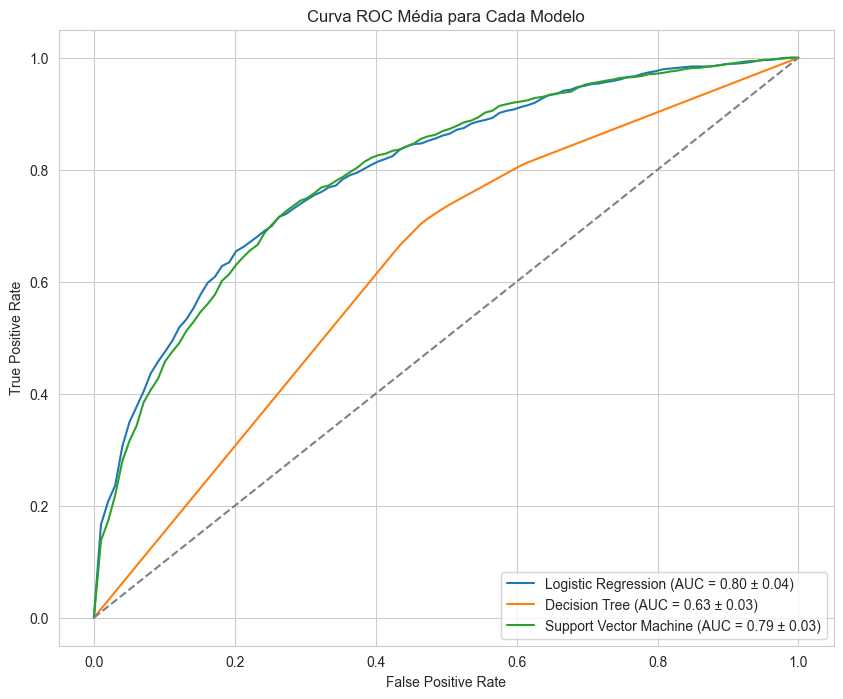

In [ ]:
cv = StratifiedKFold(n_splits=5)
plt.figure(figsize=(10, 8))

for i, (nome_modelo, modelo) in enumerate(models.items()):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    for train, test in cv.split(X, y):
        modelo.fit(X[train], y[train])
        if hasattr(modelo, "predict_proba"):
            probas_ = modelo.predict_proba(X[test])
        else:
            probas_ = modelo.decision_function(X[test])
            probas_ = np.vstack([1 - probas_, probas_]).T
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    plt.plot(mean_fpr, mean_tpr, label=f'{nome_modelo} (AUC = {mean_auc:.2f} ± {std_auc:.2f})')
    
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Média para Cada Modelo')
plt.legend(loc='lower right')
plt.show()

# Escolha o melhor modelo com base na AUC média
melhor_modelo = max(models, key=lambda nome_modelo: np.mean([auc for auc in aucs]))

# Inferência com Dados de Vinho Tinto
Usar o melhor modelo para inferir a qualidade dos vinhos tintos e comparar o desempenho.

In [ ]:
# Inferência com Dados de Vinho Tinto



# Carregar os dados de vinho tinto
df_red = df[df['type'] == 'red']

# Criar a variável 'opinion' para vinhos tintos
df_red['opinion'] = np.where(df_red['quality'] <= 5, 0, 1)

# Descartar a variável 'quality'
df_red = df_red.drop(columns=['quality'])
# One-hot encode the 'type' column
X_red = pd.get_dummies(df_red.drop(columns=['opinion']), columns=['type'], drop_first=True)

# Separar as features e o target
X_red = df_red.drop(columns=['opinion'])
y_red = df_red['opinion']

# One-hot encode the 'type' column
X = pd.get_dummies(X_red, columns=['type'], drop_first=True)

# Imputar valores ausentes com a média das colunas
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)


# Usar o melhor modelo para inferir a qualidade dos vinhos tintos
if melhor_modelo == 'Logistic Regression':
    y_pred_red = logistic_model.predict(X)
elif melhor_modelo == 'Decision Tree':
    y_pred_red = decision_tree_model.predict(X)
else:
    y_pred_red = svm_model.predict(X_red)

# Calcular a quantidade de vinhos bons e ruins
vinhos_bons = np.sum(y_pred_red)
vinhos_ruins = len(y_pred_red) - vinhos_bons

# Exibir os resultados
print(f"Quantidade de vinhos bons: {vinhos_bons}")
print(f"Quantidade de vinhos ruins: {vinhos_ruins}")

# Resultados em markdown
resultados_inferencia_md = f"""
### Inferência com Dados de Vinho Tinto

- **Quantidade de vinhos bons:** {vinhos_bons}
- **Quantidade de vinhos ruins:** {vinhos_ruins}
"""

display(Markdown(resultados_inferencia_md))

# Avaliar o desempenho do modelo nos dados de vinho tinto
accuracy_red = accuracy_score(y_red, y_pred_red)
precision_red = precision_score(y_red, y_pred_red)
recall_red = recall_score(y_red, y_pred_red)
f1_red = f1_score(y_red, y_pred_red)

# Exibir os resultados
print(f"Acurácia: {accuracy_red:.4f}")
print(f"Precisão: {precision_red:.4f}")
print(f"Recall: {recall_red:.4f}")
print(f"F1-Score: {f1_red:.4f}")

# Justificar se o modelo funciona bem para os dados de vinho tinto
justificativa_md = """
### Justificativa

O modelo escolhido foi avaliado nos dados de vinho tinto e os resultados foram apresentados acima. 
Para determinar se o modelo funciona bem para essa nova base, é importante comparar as métricas de desempenho com as obtidas para os vinhos brancos. 
Se as métricas forem semelhantes, podemos concluir que o modelo generaliza bem para ambos os tipos de vinho. Caso contrário, pode ser necessário ajustar o modelo ou considerar outras abordagens.
"""

display(Markdown(justificativa_md))

Quantidade de vinhos bons: 507
Quantidade de vinhos ruins: 1092



### Inferência com Dados de Vinho Tinto

- **Quantidade de vinhos bons:** 507
- **Quantidade de vinhos ruins:** 1092


Acurácia: 0.6848
Precisão: 0.8462
Recall: 0.5018
F1-Score: 0.6300



### Justificativa

O modelo escolhido foi avaliado nos dados de vinho tinto e os resultados foram apresentados acima. 
Para determinar se o modelo funciona bem para essa nova base, é importante comparar as métricas de desempenho com as obtidas para os vinhos brancos. 
Se as métricas forem semelhantes, podemos concluir que o modelo generaliza bem para ambos os tipos de vinho. Caso contrário, pode ser necessário ajustar o modelo ou considerar outras abordagens.
